In [3]:
import matplotlib.pyplot as plt #for visualization
import numpy as np #for scientific calculation
import pandas as pd #for data analysis
import warnings
import scipy.io
import collections
import seaborn as sns #for visualization
from IPython.core.pylabtools import figsize
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn import metrics
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
warnings.filterwarnings('ignore')
pd.options.mode.chained_assignment = None
sns.set_context(font_scale=2)
#sk learn, ML library for python

In [4]:
dataSet = pd.read_csv("train.csv")
print("Number of Rows in the set is: ",dataSet.shape)

Number of Rows in the set is:  (15120, 56)


In [5]:
inputs = dataSet.drop(['Cover_Type','Id'], axis=1)
target = dataSet.Cover_Type

In [10]:
X_train, X_valid, y_train, y_valid = train_test_split(inputs, target, test_size=0.1, random_state=1)

In [ ]:
#Tuning parameters
myModel = GridSearchCV(MLPClassifier(),{
    'hidden_layer_sizes':[(300,250,200,50),(50,100,150,200),(100,400,350,256),(50,70,10,20),(120, 200, 150, 300)],
    'hidden_layer_sizes':['identity','logistic','tahn','relu'],
    'solver':['lbfgs','sdg', 'adam'],
    'learning_rate': ['constant','invscaling','adaptive'],
    'alpha':[0.0001, 0.001, 0.05, 0.1, 1],
    'learning_rate':['constant', 'invscaling', 'adaptive'],
    'learning_rate_init':[0.001, 0.01, 0.1, 1, 5],
    'power_t':[0.5, 0.3, 0.1, 1, 5],
    'max_iter':[100,200,400,500,800],
    'tol': [1e-4, 1e-1, 0.1, 1, 5],
    'momentum' : [0.9,0.5,0.2,0.1,1],
    'validation_fraction' : [0.1, 0.01, 0.5, 0.9, 1],
    'beta_1' : [0.9,0.5,0.2,0.5,1],
    'beta_2' : [0.9,0.5,0.2,0.5,1],
    'epsilon' : [1e-8, 1e-5, 0.1, 1, 5],
    'n_iter_no_change': [10, 20, 30, 5, 50],
    'max_fun': [15000, 100, 1000, 10000, 20000],
}, cv=5, return_train_score=False)
myModel.fit(X_train, y_train)
print('Score: ', gridSearch.best_score)
print('Parameters: ',gridSearch.best_params_ )
df = pd.DataFrame(myModel.cv_results_)

In [ ]:
display(df)

In [15]:
mlp = MLPClassifier(hidden_layer_sizes =(200, 256, 256, 300, 350, 200) ,max_iter=500,activation='relu', random_state=0)
mlp.fit(X_train,y_train)
y_predict_mlp = mlp.predict(X_valid)
print(classification_report(y_predict_mlp,y_valid))

              precision    recall  f1-score   support

           1       0.70      0.74      0.72       221
           2       0.69      0.68      0.68       215
           3       0.81      0.85      0.83       195
           4       0.96      0.93      0.94       231
           5       0.92      0.86      0.89       222
           6       0.86      0.80      0.83       229
           7       0.87      0.94      0.90       199

    accuracy                           0.83      1512
   macro avg       0.83      0.83      0.83      1512
weighted avg       0.83      0.83      0.83      1512



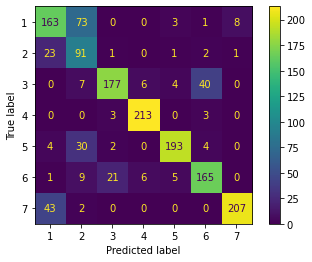

In [13]:
confusion_matrix = metrics.confusion_matrix(y_predict_mlp, y_valid)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = mlp.classes_)
cm_display.plot()
plt.show()

In [ ]:
TestSet = pd.read_csv("test.csv")
print("Number of Rows in the set is: ",TestSet.shape)

In [ ]:
reDefinedTestSet = TestSet.drop(['Id'], axis=1)
reDefinedTestSet.head()

In [ ]:
MLPPrediction = mlp.predict(reDefinedTestSet)

In [ ]:
trees = collections.Counter(MLPPrediction)
var = pd.DataFrame(trees.items())
var.columns = ['Cover_Type','Count']
var = var.sort_values(by='Cover_Type')
results = var.set_index('Cover_Type')
display(results[0:7])
var.plot(kind = 'bar', x = 'Cover_Type', y = 'Count', color="purple")
plt.show()